**TPP - UFF**

**Aprendizado de Máquina e Decisões Dirigidas por Dados**

Docente: Diogo Ferreira de Lima Silva

# Lembrando as Funções da Regressão Logística (aula 7)

A Regressão Logística supõe:

- **Problema de classificação binária**: temos $y_i \in \mathcal{C} =\{0,1\}$

- $\hat{f}(\mathbf{x}_i)= \hat{y}_i \approx y_i=P(y_i=1|\mathbf{x}_i)$

Da segunda suposição, temos que a função que aprenderemos a partir dos dados deve estimar a probabilidade de uma entrada $\mathbf{x}_i$ pertencer à classe 1. Nesse cenário, precisamos que:

$$0<=\hat{y}_i<=1$$


Assim, não podemos seguir com a mesma lógica do Perceptron, onde a classe de um exemplo era obtida a partir do sinal da equação $\mathbf{w}^T \mathbf{x}$. 

Agora, devemos aprender uma função que retorna a probabilidade acima. Para isso, usamos a função sigmoide.

$$\theta(\mathbf{w}^T \mathbf{x}) = \frac{1}{1+ e^{-\mathbf{w}^T \mathbf{x}}}$$

ou, usando $z = \mathbf{w}^T \mathbf(x)$:

$$ \theta(z)=\frac{1}{1 + e^{-z}}$$

## Implementando a Função sigmoide

In [1]:
import numpy as np

sigmoid = lambda z: 1/(1 + np.exp(-z)) # função sigmoid

print ('Sigmoid(-1) = ', sigmoid(-1))
print ('Sigmoid(0) = ', sigmoid(0))
print ('Sigmoid(1) = ', sigmoid(1))
print ('Sigmoid(10) = ', sigmoid(10))

Sigmoid(-1) =  0.2689414213699951
Sigmoid(0) =  0.5
Sigmoid(1) =  0.7310585786300049
Sigmoid(10) =  0.9999546021312976


## Visualizando a função sigmoide

In [2]:
# Vamos criar um vetor de 100 pontos linearmente espaçados entre -20 e 20
 
x = np.linspace(-20, 20, 100)  
x


array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

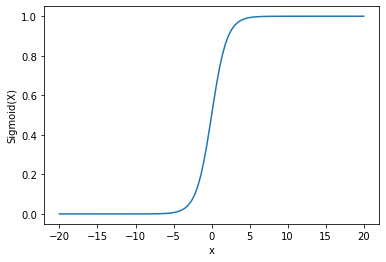

In [3]:
import matplotlib.pyplot as plt

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

Seja $z = \theta(\mathbf{w}^T \mathbf{x})$. Temos:

- Se $z\rightarrow\infty$, então $\theta(z) \approx \frac{1}{1+0}=1$

- Se $z\rightarrow - \infty$, então $\theta(z) \approx \frac{1}{1+\infty}=0$

## Função Perda e Função Custo

**Chegamos então a nossa suposição:**

$$\hat{f}(x)=\hat{y}=\theta(\mathbf{w}^T \mathbf{x})$$

A nossa tarefa é, então, aprender o vetor de parâmetros $\mathbf{w}$. Em Regressão Logística, fazemos isso minimizando uma função custo específica. 


### Entendendo a Função Perda

A perda para uma determinada observação $\mathbf{x}_i$ é dada por:

$$ L(\hat{y}_i, y_i) = -[y_i\times\log{\hat{y}_i + (1-y_i)\times\log{(1-\hat{y}_i})}]$$



 Podemos observar que essa função faz sentido analisando os 2 casos a seguir:

- **Caso 1:** $y_i=1$:
$$ L(\hat{y}_i, 1) = -[1 \times \log{\hat{y}_i + (1-1)\times\log{(1-\hat{y}_i})}]$$
Ou seja:
$$ L(\hat{y}_i, 1) = -\log{\hat{y}_i}$$
**Interpretação do caso 1**: Para minimizar a perda, queremos que $\hat{y}_i$ seja o maior possível, assim, próximo de 1.

- **Caso 2:** $y_i=0$:

$$ \mathcal{L}(\hat{y}_i, 0) = -[0 \times \log{\hat{y}_i + (1-0)\times\log{(1-\hat{y}_i})}]$$

Ou seja:

$$ \mathcal{L}(\hat{y}_i, 0) = -\log{(1-\hat{y}_i)}$$

**Interpretação do caso 2**: Para minimizar a perda, queremos que $\hat{y}_i$ seja o menor possível, assim, próximo de 0.

### Entendendo a Função Custo

Por sua vez, a função custo é dada pela média das perdas obtidas com os $n$ exemplos de treinamento. Dessa forma, temos:

$$ J = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(\hat{y}_i, y_i) $$


## Gradiente Descendente

### Aprendendo o vetor $\mathbf{w}$

Para o treinamento, nos deparamos com um conjunto de dados do seguinte tipo:
    
$$\mathcal{D}=\{(\mathbf{x}_1,y_1),(\mathbf{x}_2,y_2),...,(\mathbf{x}_n,y_n)\}$$



Como visto em aula, podemos denotar o conjunto de treinamento com uma matriz de atributos $\mathbf{X}$ e um vetor de rótulos $\mathbf{y}$.

A ideia do gradiente descendente é atualizar os parâmetros a cada passo do algoritmo conforme for a direção do gradiente da função custo em termos desses parâmetros. 

Temos:

$$w_j = w_j - \alpha \times \frac{\partial J}{\partial w_j}$$ 

In [ ]:
def propagate(w, b, X, Y):
    
    n = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))    # compute cost
    
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])
clf.score(X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334